# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.327415e+01     1.658056e+01
 * time: 0.003804922103881836
     1     6.217197e+01     1.157121e+01
 * time: 0.011301994323730469
     2     5.307296e+01     1.681484e+01
 * time: 0.10349798202514648
     3     3.832209e+01     1.162349e+01
 * time: 0.12775492668151855
     4     2.696363e+01     8.736184e+00
 * time: 0.15181398391723633
     5     2.024876e+01     6.226382e+00
 * time: 0.1728379726409912
     6     1.700614e+01     6.260241e+00
 * time: 0.1905839443206787
     7     8.656462e+00     1.664510e+00
 * time: 0.2506978511810303
     8     7.481712e+00     2.084015e+00
 * time: 0.26830387115478516
     9     6.971216e+00     1.287989e+00
 * time: 0.2856438159942627
    10     6.542431e+00     2.116275e+00
 * time: 0.29970383644104004
    11     6.295770e+00     1.046404e+00
 * time: 0.31375598907470703
    12     6.219840e+00     9.921918e-01
 * time: 0.3279080390930176
    13     6.188383e+00     1.293649e+00
 * time: 0.

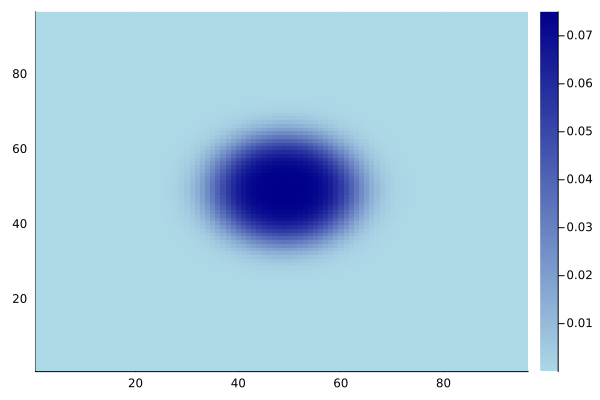

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)